In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DT = 10^-3 #s
INF_CUTOFF = 10^-9

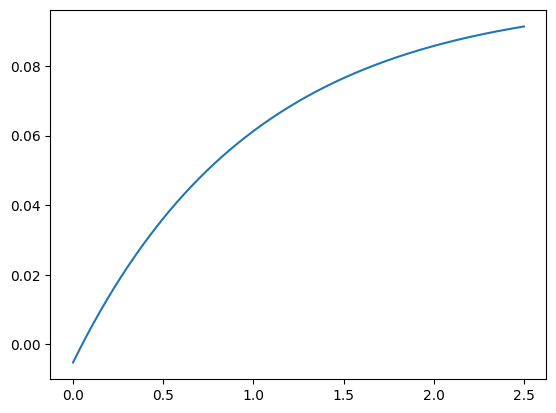

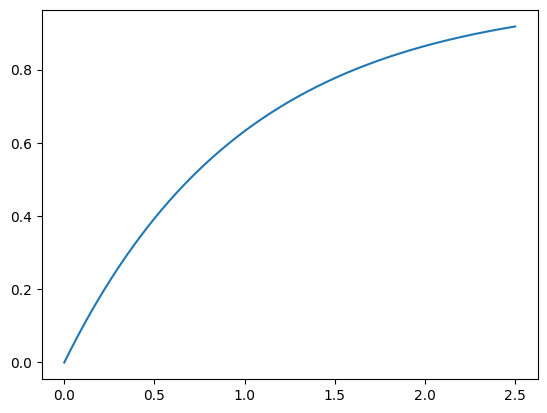

In [ ]:
import scipy.integrate as integrate

def excitatory_proportion(time):
  return 1 - np.exp(-time)

def inhibitory_proportion(time):
  return 1 - excitatory_proportion(time)

def proportion_excitatory_refractory(time, refractory_period):
  return integrate.quad(excitatory_proportion, time - refractory_period, time)[0]

def proportion_inhibitory_refractory(time, refractory_period):
  pass

def proportion_excitatory_nonrefractory(time, refractory_period):
  return 1 - proportion_excitatory_refractory(time, refractory_period)

def proportion_inhibitory_nonrefractory(time, refractory_period):
  return 1 - proportion_inhibitory_refractory(time, refractory_period)

def response_excitatory(time, refractory_period):
  pass

def response_inhibitory(time, refractory_period):
  pass

def average_excitation(time):
  pass

def threshold_distribution(threshold):
  pass


times = np.linspace(0, 2.5, 1000)
exrefr = [proportion_excitatory_refractory(t, 0.1) for t in times]
plt.plot(times, exrefr)
plt.show()
propexr = [excitatory_proportion(t) for t in times]
plt.plot(times, propexr)
plt.show()


# Model

In [ ]:
import scipy as sp
from scipy.integrate import solve_ivp
def sigmoid(x, sigmoid_a, sigmoid_theta):
  return (1 / (1 + np.exp(-1 * sigmoid_a * (x - sigmoid_theta))))

def model(t, vars, sigmoid_function, c_1=12, c_2=4, c_3=13, c_4=11, a_e=1.2, theta_e=2.8, a_i=1, theta_i=4, r_e=1, r_i=1, big_p=0, big_q=0):
  big_e, big_i = vars
  k_e = sigmoid_function(0, a_e, theta_e)
  k_i = sigmoid_function(0, a_i, theta_i)
  dedt = -1 * big_e + (k_e - r_e * big_e) * sigmoid_function(c_1 * big_e - c_2 * big_i + big_p, a_e, theta_e)
  didt = -1 * big_i + (k_i - r_i * big_i) * sigmoid_function(c_3 * big_e - c_4 * big_i + big_q, a_e, theta_e)


sol = solve_ivp(model, t_span=(0, 1), y0=[0, 0], args=[sigmoid], method='RK45')

print(sol)



  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00]
        y: [[0]
            [0]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2738
     njev: 0
      nlu: 0
